In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [ ]:

import zipfile

# Path to the uploaded zip file
zip_path = '/archive.zip'  # Change this to the actual zip file name

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/archive.zip')

# Path to the unzipped folder
data_path = '/archive.zip'


FileNotFoundError: [Errno 2] No such file or directory: '/archive.zip'

In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = r'/content/drive/MyDrive/leapGestRecog'

In [8]:
image_data = []

# Check if the data path exists
if os.path.exists(data_path):
    for dr in os.listdir(data_path):
        for category in CATEGORIES:
            class_index = CATEGORIES.index(category)
            path = os.path.join(data_path, dr, category)

            # Check if the category path exists
            if os.path.exists(path):
                for img in os.listdir(path):
                    try:
                        img_path = os.path.join(path, img)
                        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img_arr is not None:
                            resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                            image_data.append([resized_img, class_index])
                    except Exception as e:
                        print(f"Error processing image {img}: {e}")
else:
    print(f"Data path {data_path} does not exist")

# Print the first element of image_data if available
if image_data:
    print(image_data[0])
else:
    print("No image data found")

[array([[4, 6, 5, ..., 2, 4, 4],
       [4, 4, 5, ..., 4, 3, 4],
       [5, 4, 4, ..., 3, 4, 3],
       ...,
       [4, 4, 4, ..., 3, 4, 5],
       [5, 4, 5, ..., 3, 4, 4],
       [5, 4, 4, ..., 3, 2, 4]], dtype=uint8), 5]


In [9]:
# shuffle the input data
import random
random.shuffle(image_data)

In [10]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [11]:
label[:10]

[6, 6, 9, 7, 8, 9, 6, 5, 9, 7]

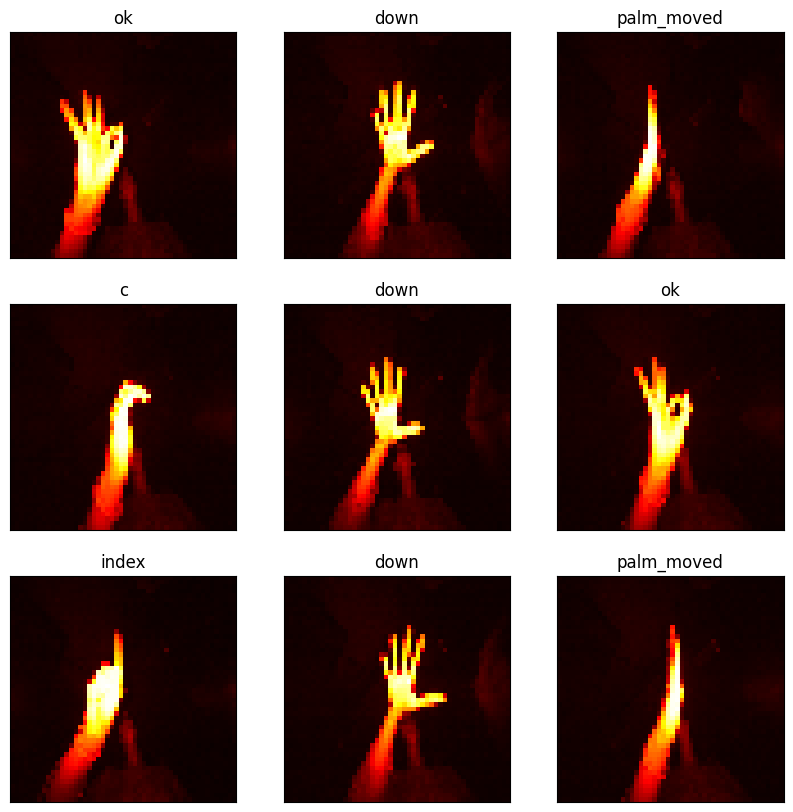

In [12]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [13]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(830, 50, 50)

In [18]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [19]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=1)

Creating Model

In [21]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

Fitting the Model

In [22]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
19/19 [==============================] - 8s 54ms/step - loss: 1.0289 - accuracy: 0.7212 - val_loss: 0.1114 - val_accuracy: 0.9679
Epoch 2/7
19/19 [==============================] - 0s 9ms/step - loss: 0.0998 - accuracy: 0.9673 - val_loss: 0.0215 - val_accuracy: 0.9960
Epoch 3/7
19/19 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 8.9758e-04 - val_accuracy: 1.0000
Epoch 4/7
19/19 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.4744e-05 - val_accuracy: 1.0000
Epoch 5/7
19/19 [==============================] - 0s 9ms/step - loss: 4.6138e-04 - accuracy: 1.0000 - val_loss: 9.5535e-05 - val_accuracy: 1.0000
Epoch 6/7
19/19 [==============================] - 0s 9ms/step - loss: 1.3334e-04 - accuracy: 1.0000 - val_loss: 3.6744e-05 - val_accuracy: 1.0000
Epoch 7/7
19/19 [==============================] - 0s 10ms/step - loss: 4.8401e-05 - accuracy: 1.0000 - val_loss: 2.3743e-05 - val_accuracy:

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

Predicting

In [43]:
# Predict the class probabilities for the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=-1)

# Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test, axis=-1)

8/8 [==============================] - 0s 2ms/step


In [44]:
class_report = classification_report(y_true_classes, y_pred_classes)
print('Classification Report')
print(class_report)

Classification Report
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        70
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        64

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



Evaluating Model

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


8/8 [==============================] - 0s 4ms/step - loss: 2.3743e-05 - accuracy: 1.0000
Test loss: 2.3743334168102592e-05
Test accuracy: 1.0


Epoch 1/7
19/19 [==============================] - 0s 17ms/step - loss: 4.1167e-05 - accuracy: 1.0000 - val_loss: 1.8874e-05 - val_accuracy: 1.0000
Epoch 2/7
19/19 [==============================] - 0s 13ms/step - loss: 5.6738e-05 - accuracy: 1.0000 - val_loss: 1.7043e-05 - val_accuracy: 1.0000
Epoch 3/7
19/19 [==============================] - 0s 10ms/step - loss: 4.2378e-05 - accuracy: 1.0000 - val_loss: 1.3212e-05 - val_accuracy: 1.0000
Epoch 4/7
19/19 [==============================] - 0s 10ms/step - loss: 2.7607e-05 - accuracy: 1.0000 - val_loss: 9.8433e-06 - val_accuracy: 1.0000
Epoch 5/7
19/19 [==============================] - 0s 10ms/step - loss: 2.4207e-05 - accuracy: 1.0000 - val_loss: 8.7485e-06 - val_accuracy: 1.0000
Epoch 6/7
19/19 [==============================] - 0s 10ms/step - loss: 4.1835e-05 - accuracy: 1.0000 - val_loss: 9.4101e-06 - val_accuracy: 1.0000
Epoch 7/7
19/19 [==============================] - 0s 12ms/step - loss: 3.1241e-05 - accuracy: 1.0000 - val_loss

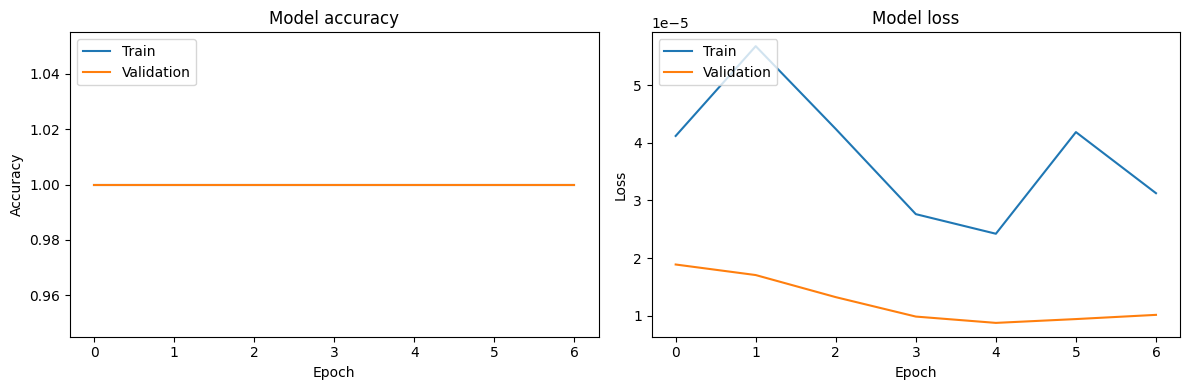

In [38]:
# Assuming you have stored the history of the model training in a variable `history`

history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Testing Model

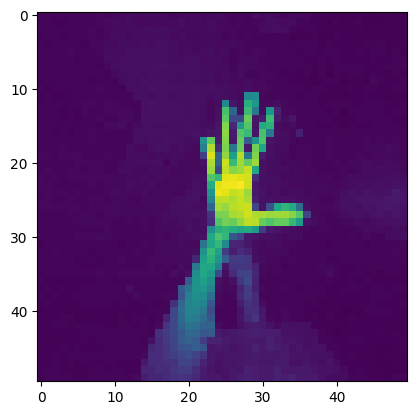

In [34]:
plt.imshow(X_train[10])

In [45]:
#Actual
y_test[10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [46]:
#Predicted
y_pred[10]

array([1.2771661e-19, 9.4521024e-21, 1.7846446e-19, 6.6102743e-20,
       1.0980662e-20, 5.6645777e-06, 2.6373345e-10, 9.9999392e-01,
       3.5072028e-07, 1.2736818e-09], dtype=float32)

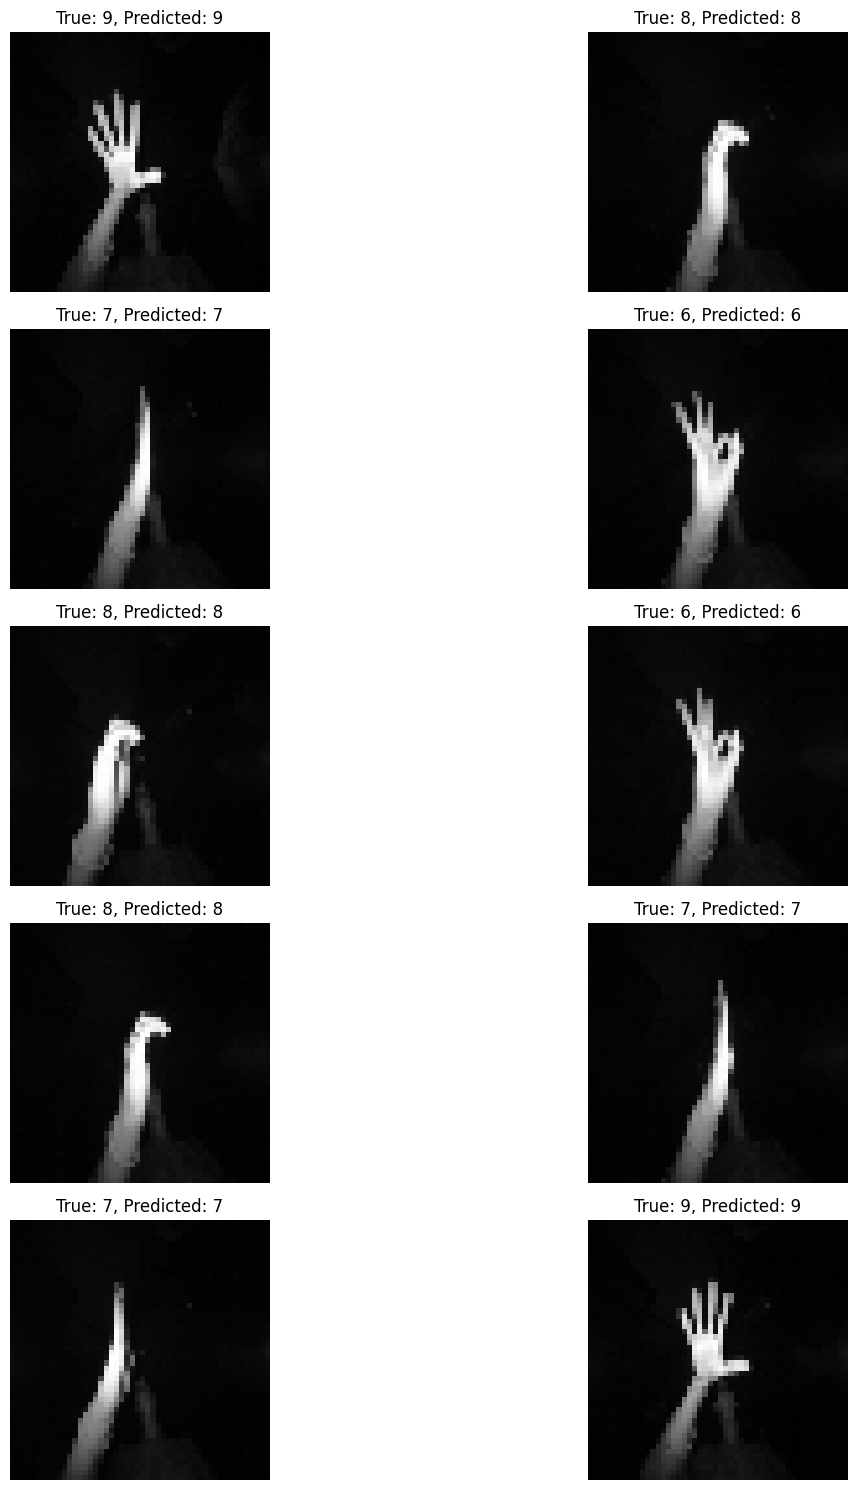

In [48]:
import matplotlib.pyplot as plt

def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(5, 2, i + 1)
        plt.imshow(X[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
        plt.title(f"True: {y_true[i]}, Predicted: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select a sample of test data
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_indices]
y_true_sample = y_true_classes[sample_indices]
y_pred_sample = y_pred_classes[sample_indices]

# Plot sample predictions
plot_sample_predictions(X_sample, y_true_sample, y_pred_sample)
